In [1]:
from google.colab import drive


In [2]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!pip install -Uq fastai2
import fastai2
from fastai2.vision import *     

In [4]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
fastai2. __version__

'0.0.30'

this is to check our fastai2 version


In [17]:
grade = 'grade1', 'grade2','grade3', 'grade4'
path = 'gdrive/MyDrive/assert_task'
p_path=Path(path)
fns = get_image_files(path)
fns

(#112) [Path('gdrive/MyDrive/assert_task/grade3/IMG_0426.JPG'),Path('gdrive/MyDrive/assert_task/grade3/IMG_0415.JPG'),Path('gdrive/MyDrive/assert_task/grade3/IMG_0425.JPG'),Path('gdrive/MyDrive/assert_task/grade3/IMG_0435.JPG'),Path('gdrive/MyDrive/assert_task/grade3/IMG_0418.JPG'),Path('gdrive/MyDrive/assert_task/grade3/IMG_0431.JPG'),Path('gdrive/MyDrive/assert_task/grade3/IMG_0412.JPG'),Path('gdrive/MyDrive/assert_task/grade3/IMG_0433.JPG'),Path('gdrive/MyDrive/assert_task/grade3/IMG_0427.JPG'),Path('gdrive/MyDrive/assert_task/grade3/IMG_0434.JPG')...]

In [7]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [8]:
chili = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.05, seed=42),
    get_y=parent_label,
    item_tfms=Resize(640))

In [9]:
dls = chili.dataloaders(path, bs=4)

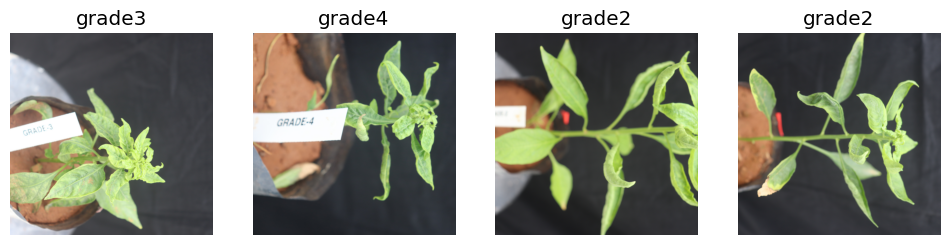

In [10]:
dls.valid.show_batch(max_n=4, nrows=1)

In [12]:
!nvidia-smi


Tue May  9 09:39:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    29W /  70W |    699MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61

In [14]:
learn.fine_tune(430)

epoch,train_loss,valid_loss,error_rate,time
0,1.904268,0.480574,0.400000,00:38


epoch,train_loss,valid_loss,error_rate,time
0,0.813672,0.117160,0.000000,00:22
1,0.762397,0.071719,0.000000,00:21
2,0.798963,0.059774,0.000000,00:21
3,0.762777,0.030361,0.000000,00:22
4,0.665673,0.114323,0.000000,00:20
5,0.518503,0.122273,0.000000,00:20
6,0.545862,0.082183,0.000000,00:22
7,0.578746,0.029532,0.000000,00:20
8,0.446978,0.025944,0.000000,00:20
9,0.443257,0.033286,0.000000,00:21


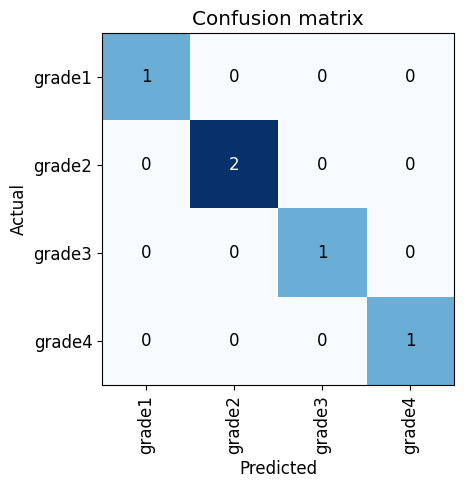

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

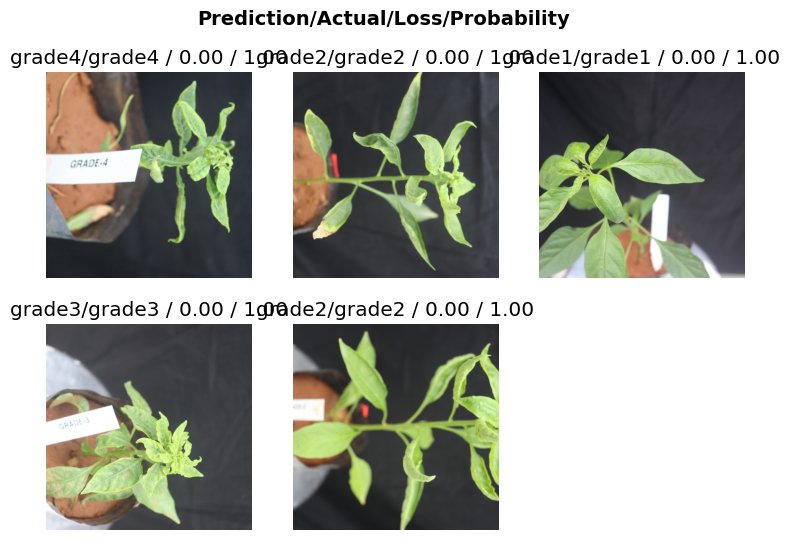

In [24]:
interp.plot_top_losses(5, nrows=2)

The code above shows us the images with the highest losses. Each image is labelled with its predicted label, actual label, loss and probability respectively. This is how we check for images that are classified wrongly.

In [16]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [21]:
learn.export('/content/gdrive/MyDrive/export.pkl')

#Inference

In [13]:
from fastai.vision.all import *

In [14]:
learn = load_learner('/content/export.pkl', cpu=False)

In [15]:
learn.dls.to(device='cuda')
learn.model.to(device='cuda')

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [16]:
learn.save('resnet50_chili_save', with_opt=False)

Path('models/resnet50_chili_save.pth')

In [18]:
chili = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.05, seed=42),
    get_y=parent_label,
    item_tfms=Resize(640))

In [19]:
dls = chili.dataloaders(path, bs=4)

In [20]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [21]:
learn.load('resnet50_chili_save')

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:59: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [22]:
learn.predict('/content/gdrive/MyDrive/assert_task/grade1/IMG_0462.JPG')

('grade1', tensor(0), tensor([9.9945e-01, 2.5320e-05, 8.7472e-06, 5.1739e-04]))